<a href="https://colab.research.google.com/github/shazzad-hasan/github_demo/blob/main/en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/Questions

/content/drive/My Drive/Colab Notebooks/Questions


In [3]:
!ls

corpus.train.bn  corpus.train.en


In [4]:
!pip uninstall nltk==3.2.5
!pip install nltk==3.6.2

Found existing installation: nltk 3.2.5
Uninstalling nltk-3.2.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/nltk-3.2.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.5 MB 7.1 MB/s 


In [5]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams


%matplotlib inline

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Load and read the dataset

In [7]:
file = open('corpus.train.en', encoding = 'utf8').read()

### Data Preprocessing

In [8]:
import string

# string punctuation and other special characters present in the dataset which we would like to remove
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
# remove periods
string.punctuation = string.punctuation.replace('.', '')

In [9]:
# preprocess dataset 

file_nl_removed = ""

for line in file:
  # remove new lines
  line_nl_removed = line.replace("\n", " ")     
  file_nl_removed += line_nl_removed
  
# remove all special characters
file_p = "".join([char for char in file_nl_removed if char not in string.punctuation]) 

In [10]:
print(file_p[:200])

better o . Guaranteeing that every individual will be free to do as he wishes inevitably shortchanges equality. trump overrides They warm the heart and ease the daily load. I love you. Port Company Li


## Task 7: Data Statistics

In [11]:
sentences = nltk.sent_tokenize(file_p)
print("The number of sentences is", len(sentences)) 

words = nltk.word_tokenize(file_p)
print("The number of tokens is", len(words)) 

average_tokens = round(len(words)/len(sentences))
print("The average number of tokens per sentence is", average_tokens) 

unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens)) 

The number of sentences is 1722902
The number of tokens is 32638493
The average number of tokens per sentence is 19
The number of unique tokens are 506592


### Task 1: N-gram Models (bigram, trigram)

In [12]:
bigram=[]
trigram=[]

# create bigram and trigram models
for sentence in sentences[:1000]:
    sentence = sentence.lower()
    sequence = word_tokenize(sentence) 
    bigram.extend(list(ngrams(sequence, 2)))  
    trigram.extend(list(ngrams(sequence, 3)))

In [13]:
print(bigram[:5])

[('better', 'o'), ('o', '.'), ('guaranteeing', 'that'), ('that', 'every'), ('every', 'individual')]


In [14]:
print(trigram[:5])

[('better', 'o', '.'), ('guaranteeing', 'that', 'every'), ('that', 'every', 'individual'), ('every', 'individual', 'will'), ('individual', 'will', 'be')]


In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
def removal(x):     
    """ removes ngrams containing only stopwords""" 
    y = []
    for pair in x:
        count = 0
        for word in pair:
            if word in stop_words:
                count = count or 0
            else:
                count = count or 1
        if (count==1):
            y.append(pair)
    return(y)

bigram = removal(bigram)
trigram = removal(trigram) 

freq_bi = nltk.FreqDist(bigram)
freq_tri = nltk.FreqDist(trigram)

print ("Most common bigrams: ", freq_bi.most_common(5))
print ("Most common trigrams: ", freq_tri.most_common(5))

Most common bigrams:  [(('the', 'first'), 15), (('according', 'to'), 11), (('one', 'of'), 11), (('a', 'new'), 10), (('the', 'bible'), 10)]
Most common trigrams:  [(('the', 'contracting', 'parties'), 7), (('the', 'spirit', 'of'), 5), (('with', 'god', '.'), 4), (('is', 'located', 'at'), 4), (('as', 'well', 'as'), 4)]


### Task 3: Word frequencies using Zipf's law

In [17]:
import operator
from operator import itemgetter


# Calculate the frequency of the words inside
frequency = {}
for word in words:
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

for word , freq in collection[:1000]:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
df.head()

,Rank,Frequency,Frequency * Rank
.,1,1713841,1713841
the,2,1625091,3250182
of,3,1020362,3061086
and,4,768521,3074084
to,5,742014,3710070


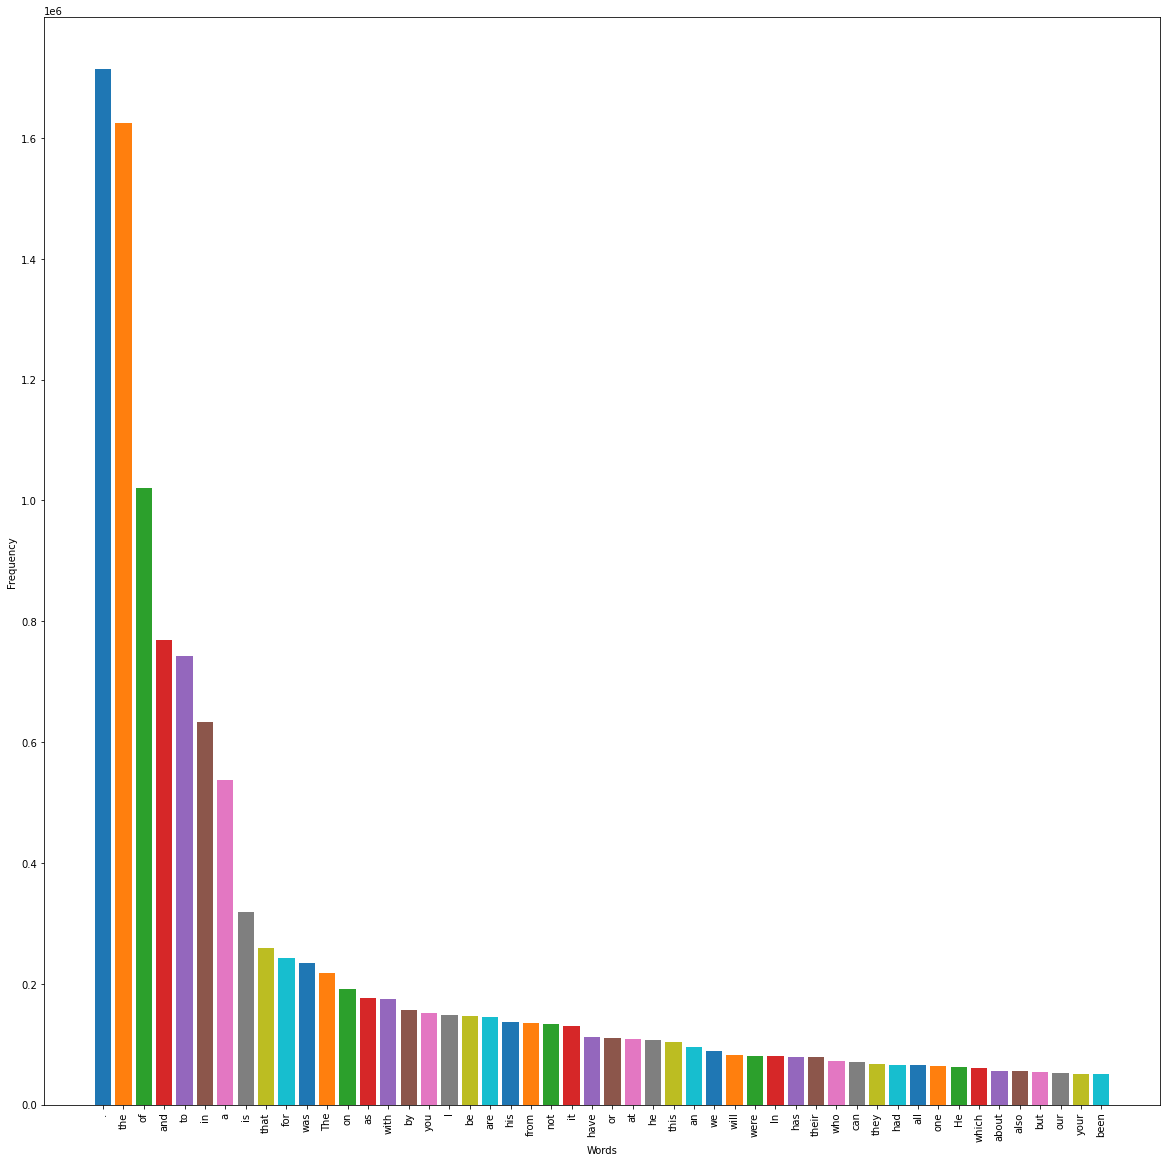

In [18]:
# Python visualization with pyplot
plt.figure(figsize=(20,20)) 
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)

for word , freq in collection[:50]:
    plt.bar(word, freq)    
plt.show()

### Task 4: Stemming and Lemmatisation

In [19]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# Stemming the words
# steming_words = [stemmer.stem(word) for word in words if not word in stop_words]

for word in words[:20]:
  if not word in stop_words:
    print(word+' -> '+ stemmer.stem(word))

better -> better
. -> .
Guaranteeing -> guarante
every -> everi
individual -> individu
free -> free
wishes -> wish
inevitably -> inevit
shortchanges -> shortchang
equality -> equal
. -> .
trump -> trump


In [20]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Lemmatizing the words
# lematizing_words = [lemmatizer.lemmatize(word) for word in words if not word in stop_words]

for word in words[:20]:
  if not word in stop_words:
    print(word+' -> '+ lemmatizer.lemmatize(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


better -> better
. -> .
Guaranteeing -> Guaranteeing
every -> every
individual -> individual
free -> free
wishes -> wish
inevitably -> inevitably
shortchanges -> shortchanges
equality -> equality
. -> .
trump -> trump


### Task 5: Sentence repetition

In [21]:
duplicates = []
cleaned = []
for sentence in sentences[:2000]:
    if sentence in cleaned:
        if sentence in duplicates:
            continue
        else:
            duplicates.append(sentence)
    else:
        cleaned.append(sentence)

print(duplicates[:3])

['Limit introductory comments to less than a minute and follow with a questionandanswer discussion.', '1.', 'Yes sir.']


### Task 6: Tf-Idf measurements

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

tf_idf =  vec.fit_transform(sentences[:10])
print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

       2012  advocacy     after  aljazeera  alrawahi     also       and  \
0  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   
1  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   
2  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.226670   
3  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   
4  0.000000  0.000000  0.000000   0.000000  0.000000  0.17602  0.130911   
5  0.000000  0.000000  0.000000   0.259159  0.000000  0.00000  0.192744   
6  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   
7  0.194469  0.194469  0.194469   0.000000  0.194469  0.00000  0.000000   
8  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   
9  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  0.000000   

    anybody        as  attitude  ...      warm       was      went      will  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
